## **Import Required Libraries**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras.utils.vis_utils import plot_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

## **Read the Original Data**
### Dataset 3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
directory = '/content/drive/MyDrive/Soft Computing LAB/Dataset 3.csv'

data = pd.read_csv(directory, engine = 'python')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,tweets,sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


## **Understanding Data**


In [ ]:
data = data.sample(frac = 1., random_state = 14).reset_index(drop = True)

print(data['sentiment'].value_counts(0))
data

0    8000
1    2314
Name: sentiment, dtype: int64


,tweets,sentiment
0,@1WineDude That's a really cool giveaway!,0
1,Need a good web series? Check out GIANTS on Yo...,1
2,Procastinated by doing up a new playlist for T...,0
3,"@ZeenaBoBeena eeeek!!!! Good luck, Zeena!!! Yo...",0
4,@ChynaDoll74 Good morning to you too,0
...,...,...
10309,Summer session starts today Why am I smiling.,0
10310,@Desireeeeee really me to.!,0
10311,@Jason_Pollock I think they heard you.,0
10312,@OliviaMaynard13 You're most welcome. I don't ...,1


## **Spliting Dataset**


In [ ]:
EPOCH = 10

split_val = int(0.2 * data.shape[0])

dataTest = data.iloc[-split_val :]
dataVal = data.iloc[- 2 * split_val : -split_val]
dataTrain = data.iloc[: - 2 * split_val]

In [ ]:
print(dataTrain['sentiment'].value_counts())

dataTrain

0    4784
1    1406
Name: sentiment, dtype: int64


,tweets,sentiment
0,@1WineDude That's a really cool giveaway!,0
1,Need a good web series? Check out GIANTS on Yo...,1
2,Procastinated by doing up a new playlist for T...,0
3,"@ZeenaBoBeena eeeek!!!! Good luck, Zeena!!! Yo...",0
4,@ChynaDoll74 Good morning to you too,0
...,...,...
6185,"free draw, lit easily, puffing away",0
6186,Depression is coming i feel it my veins just w...,1
6187,at gator joe's with heather and then movies to...,0
6188,Ughhh so over nightmares - So Instead of sleep...,0


In [ ]:
print(dataTest['sentiment'].value_counts())

dataTest

0    1610
1     452
Name: sentiment, dtype: int64


,tweets,sentiment
8252,One of my mini poems. #helenswriting#mentalhea...,1
8253,@y2kprawn you went to college here? Didn't kno...,0
8254,The Young Life Podcast #1 - Depression 101: h...,1
8255,'s hair is so soft today.,0
8256,At the point where I'm legitimately pissed whe...,1
...,...,...
10309,Summer session starts today Why am I smiling.,0
10310,@Desireeeeee really me to.!,0
10311,@Jason_Pollock I think they heard you.,0
10312,@OliviaMaynard13 You're most welcome. I don't ...,1


In [ ]:
trainX = np.array(dataTrain.iloc[:, 0])
trainY = np.array(dataTrain.iloc[:, 1])

valX = np.array(dataVal.iloc[:, 0])
valY = np.array(dataVal.iloc[:, 1])

testX = np.array(dataTest.iloc[:, 0])
testY = np.array(dataTest.iloc[:, 1])



## **Tokenizing Data**


In [ ]:
top_k = 50000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = top_k,
                                                  oov_token = "<unk>",
                                                  filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
tokenizer.fit_on_texts(trainX)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

train_seqs = tokenizer.texts_to_sequences(trainX)
val_seqs = tokenizer.texts_to_sequences(valX)
test_seqs = tokenizer.texts_to_sequences(testX)

train_seqs = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding = 'pre')
val_seqs = tf.keras.preprocessing.sequence.pad_sequences(val_seqs, padding = 'pre')
test_seqs = tf.keras.preprocessing.sequence.pad_sequences(test_seqs, padding = 'pre')

## **Develop Model**


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2072576   
_________________________________________________________________
lstm_5 (LSTM)                (None, None, 256)         394240    
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 512)         1574912   
_________________________________________________________________
lstm_7 (LSTM)                (None, None, 128)         328192    
_________________________________________________________________
lstm_8 (LSTM)                (None, None, 64)          49408     
_________________________________________________________________
lstm_9 (LSTM)                (None, 8)                 2336      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

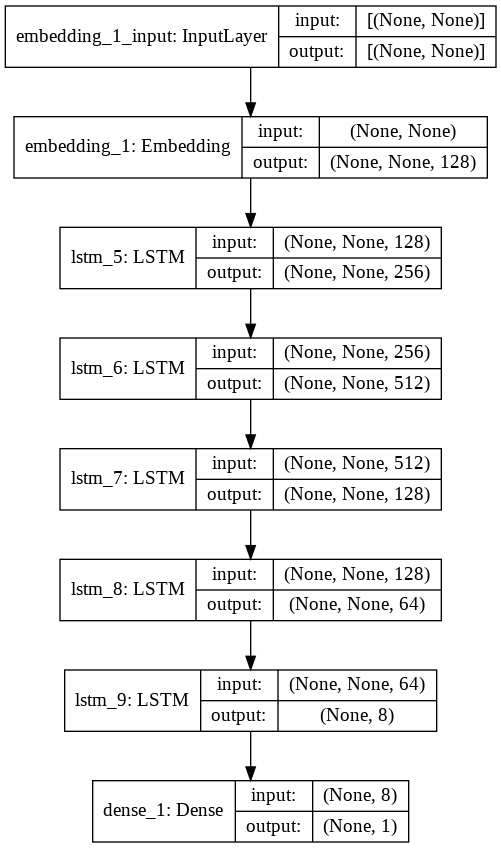

In [ ]:
model = Sequential()
model.add(layers.Embedding(len(tokenizer.word_index), 128))
model.add(layers.LSTM(256, return_sequences = True, dropout = 0.2))
model.add(layers.LSTM(512, return_sequences = True, dropout = 0.2))
model.add(layers.LSTM(128, return_sequences = True, dropout = 0.2))
model.add(layers.LSTM(64, return_sequences = True, dropout = 0.2))
model.add(layers.LSTM(8, dropout = 0.2))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

Epoch 1/10
194/194 [==============================] - 340s 2s/step - loss: 0.1950 - accuracy: 0.9296 - val_loss: 0.0544 - val_accuracy: 0.9927
Epoch 2/10
194/194 [==============================] - 327s 2s/step - loss: 0.0267 - accuracy: 0.9969 - val_loss: 0.0473 - val_accuracy: 0.9903
Epoch 3/10
194/194 [==============================] - 327s 2s/step - loss: 0.0437 - accuracy: 0.9910 - val_loss: 0.2716 - val_accuracy: 0.9054
Epoch 4/10
194/194 [==============================] - 324s 2s/step - loss: 0.0273 - accuracy: 0.9953 - val_loss: 0.0367 - val_accuracy: 0.9942
Epoch 5/10
194/194 [==============================] - 326s 2s/step - loss: 0.0203 - accuracy: 0.9971 - val_loss: 0.0356 - val_accuracy: 0.9937
Epoch 6/10
194/194 [==============================] - 327s 2s/step - loss: 0.0086 - accuracy: 0.9992 - val_loss: 0.0346 - val_accuracy: 0.9947
Epoch 7/10
194/194 [==============================] - 330s 2s/step - loss: 0.0077 - accuracy: 0.9992 - val_loss: 0.0351 - val_accuracy: 0.9947

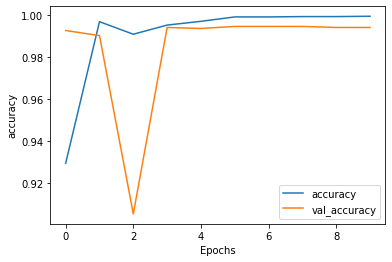

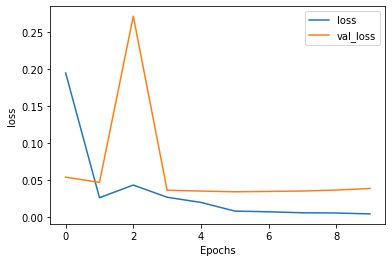


Epoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss
       1   0.929564 	   0.194995 	   0.992725 	   0.054354
       2   0.996931 	   0.026652 	   0.990301 	   0.047330
       3   0.990953 	   0.043745 	   0.905432 	   0.271591
       4   0.995315 	   0.027298 	   0.994180 	   0.036715
       5   0.997092 	   0.020277 	   0.993695 	   0.035635
       6   0.999192 	   0.008583 	   0.994665 	   0.034646
       7   0.999192 	   0.007664 	   0.994665 	   0.035150
       8   0.999354 	   0.006292 	   0.994665 	   0.035675
       9   0.999354 	   0.005996 	   0.994180 	   0.036980
      10   0.999515 	   0.004775 	   0.994180 	   0.039133


In [ ]:
history = model.fit(train_seqs, trainY, epochs = EPOCH, validation_data = (val_seqs, valY), verbose = 1)

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

print('\nEpoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['accuracy'][i], history.history['loss'][i], history.history['val_accuracy'][i], history.history['val_loss'][i]))

##**Measuring Performance**


### Train Data Performance

194/194 [==============================] - 66s 331ms/step - loss: 0.0046 - accuracy: 0.9995
Train Loss: 0.004613825585693121
Train Accuracy: 0.9995153546333313 (Model Metric)
Train Accuracy: 0.9995153473344104 (sklearn Metric)
Train Precision: 1.0
Train Recall: 0.9978662873399715
Train F1-score: 0.9989320042719829


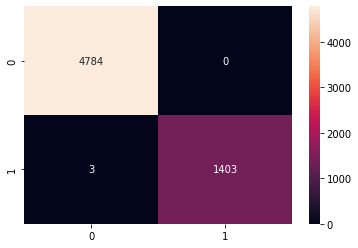

In [ ]:
y_pred = model.predict(train_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(train_seqs, trainY, verbose = 1)
print('Train Loss:', loss)
print('Train Accuracy:', accuracy, '(Model Metric)')
print('Train Accuracy:', accuracy_score(trainY, y_pred), '(sklearn Metric)')
print('Train Precision:', precision_score(trainY, y_pred))
print('Train Recall:', recall_score(trainY, y_pred))
print('Train F1-score:', f1_score(trainY, y_pred))

sns.heatmap(confusion_matrix(trainY, y_pred), annot = True, fmt = 'g')

### Validation Data Performance

65/65 [==============================] - 18s 279ms/step - loss: 0.0391 - accuracy: 0.9942
Validation Loss: 0.039132535457611084
Validation Accuracy: 0.9941803812980652 (Model Metric)
Validation Accuracy: 0.9941804073714839 (sklearn Metric)
Validation Precision: 0.9977578475336323
Validation Recall: 0.9758771929824561
Validation F1-score: 0.9866962305986695


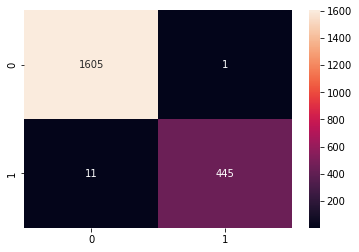

In [ ]:
y_pred = model.predict(val_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(val_seqs, valY, verbose = 1)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy, '(Model Metric)')
print('Validation Accuracy:', accuracy_score(valY, y_pred), '(sklearn Metric)')
print('Validation Precision:', precision_score(valY, y_pred))
print('Validation Recall:', recall_score(valY, y_pred))
print('Validation F1-score:', f1_score(valY, y_pred))

sns.heatmap(confusion_matrix(valY, y_pred), annot = True, fmt = 'g')

### Test Data Performance

65/65 [==============================] - 18s 253ms/step - loss: 0.0313 - accuracy: 0.9952
Test Loss: 0.03127261996269226
Test Accuracy: 0.9951503276824951 (Model Metric)
Test Accuracy: 0.9951503394762367 (sklearn Metric)
Test Precision: 0.9977477477477478
Test Recall: 0.9800884955752213
Test F1-score: 0.9888392857142857


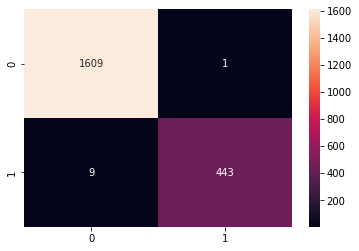

In [ ]:
y_pred = model.predict(test_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(test_seqs, testY, verbose = 1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy, '(Model Metric)')
print('Test Accuracy:', accuracy_score(testY, y_pred), '(sklearn Metric)')
print('Test Precision:', precision_score(testY, y_pred))
print('Test Recall:', recall_score(testY, y_pred))
print('Test F1-score:', f1_score(testY, y_pred))

sns.heatmap(confusion_matrix(testY, y_pred), annot = True, fmt = 'g')